## **Dependecies**

In [1]:
! pip install kagglehub
! pip install pandas
! pip install ydata_profiling
! pip install numpy==2.0
! pip install ipywidgets
! pip install ace_tools

In [2]:
import kagglehub
import pandas as pd
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Load Dataset**

In [3]:
# Download latest version
path = kagglehub.dataset_download("luvathoms/portugal-real-estate-2024")

print("Path to dataset files:", path)

Path to dataset files: /Users/mafaldaaires/.cache/kagglehub/datasets/luvathoms/portugal-real-estate-2024/versions/7


In [4]:
cd

/Users/mafaldaaires


In [5]:
csv_file = ".cache/kagglehub/datasets/luvathoms/portugal-real-estate-2024/versions/6/portugal_listinigs.csv"

In [6]:
df = pd.read_csv(csv_file)

/var/folders/50/dpngyqjs3h1d04k0k_thn7j00000gn/T/ipykernel_36007/298181477.py:1: DtypeWarning: Columns (9,10,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


## **Dataset Informations**

In [7]:
df.head()

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Carrazedo de Montenegro e Curros,Farm,NC,200.0,552450.0,0.0,False,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0


In [8]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in Price:
[780000. 223000. 228000. ... 424600. 252350. 774500.]


Unique values in District:
['Vila Real' 'Faro' 'Leiria' 'Porto' 'Lisboa' 'Guarda' 'Viseu' 'Setúbal'
 'Coimbra' 'Castelo Branco' 'Ilha Terceira' 'Beja' 'Santarém' 'Aveiro'
 'Évora' 'Braga' 'Ilha de São Miguel' 'Portalegre' 'Bragança'
 'Viana do Castelo' 'Ilha da Madeira' 'Ilha de Porto Santo'
 'Ilha de Santa Maria' 'Ilha de São Jorge' 'Z - Fora de Portugal']


Unique values in City:
['Valpaços' 'São Brás de Alportel' 'Albufeira' 'Castro Marim' 'Portimão'
 'Loulé' 'Vila do Bispo' 'Olhão' 'Faro' 'Lagos' 'Peniche'
 'Vila Real de Santo António' 'Alcoutim' 'Lagoa (Algarve)' 'Silves'
 'Aljezur' 'Tavira' 'Porto' 'Monchique' 'Sintra' 'Seia'
 'Paços de Ferreira' 'Manteigas' 'Figueira de Castelo Rodrigo' 'Tondela'
 'Trancoso' 'Gouveia' 'Vila Nova de Foz Côa' 'Guarda' 'Almeida'
 'Celorico da Beira' 'Setúbal' 'Mêda' 'Matosinhos' 'Lisboa'
 'Fornos de Algodres' 'Aguiar da Beira' 'Ansião' 'Pinhel' 'Sabugal'
 'Coimbra' 'Aza

In [9]:
print("Número de linhas e colunas:", df.shape)

Número de linhas e colunas: (122223, 25)


In [10]:
print("\nInformações do dataframe:")
print(df.info())


Informações do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122223 entries, 0 to 122222
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  121942 non-null  float64
 1   District               122223 non-null  object 
 2   City                   122223 non-null  object 
 3   Town                   122221 non-null  object 
 4   Type                   122207 non-null  object 
 5   EnergyCertificate      122209 non-null  object 
 6   GrossArea              27638 non-null   float64
 7   TotalArea              115047 non-null  float64
 8   Parking                122029 non-null  float64
 9   HasParking             68215 non-null   object 
 10  Floor                  27929 non-null   object 
 11  ConstructionYear       79272 non-null   float64
 12  EnergyEfficiencyLevel  53976 non-null   object 
 13  PublishDate            20195 non-null   object 
 14  Garage   

In [11]:
print("Total number of duplicate rows or values in the dataset: ")
print(df.duplicated().sum())

Total number of duplicate rows or values in the dataset: 
7188


In [12]:
print("Duplicated rows indices:")
duplicates = list(df[df.duplicated()].index)
print(duplicates)

Duplicated rows indices:
[93, 152, 153, 154, 155, 156, 157, 158, 159, 176, 177, 184, 215, 278, 280, 281, 283, 307, 308, 309, 321, 345, 346, 358, 368, 389, 421, 443, 463, 479, 480, 521, 539, 540, 588, 590, 607, 608, 610, 611, 625, 626, 627, 629, 630, 634, 648, 649, 650, 661, 687, 699, 700, 734, 744, 780, 781, 784, 787, 790, 816, 858, 877, 878, 892, 894, 896, 904, 908, 927, 931, 1020, 1021, 1030, 1035, 1043, 1044, 1046, 1047, 1048, 1049, 1061, 1065, 1066, 1068, 1069, 1071, 1072, 1078, 1127, 1128, 1133, 1138, 1144, 1145, 1149, 1152, 1153, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1171, 1172, 1173, 1175, 1177, 1178, 1179, 1183, 1201, 1211, 1214, 1215, 1250, 1264, 1265, 1267, 1269, 1271, 1272, 1273, 1274, 1277, 1278, 1279, 1281, 1282, 1360, 1406, 1407, 1409, 1411, 1425, 1426, 1429, 1430, 1432, 1446, 1482, 1484, 1532, 1810, 1863, 2084, 2150, 2270, 2271, 2272, 2282, 2324, 2336, 2337, 2338, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2397, 2398, 2399, 2400, 2401, 2402, 2403, 24

In [13]:
df = df.drop_duplicates()
print("Duplicated rows removed.")

Duplicated rows removed.


In [14]:
print("Missing values in each feature: ")
df.isna().sum()

Missing values in each feature: 


Price                       267
District                      0
City                          0
Town                          2
Type                         15
EnergyCertificate            13
GrossArea                 89021
TotalArea                  6834
Parking                     146
HasParking                51153
Floor                     88936
ConstructionYear          39558
EnergyEfficiencyLevel     63912
PublishDate               95496
Garage                    63912
Elevator                     30
ElectricCarsCharging      63912
TotalRooms                50691
NumberOfBedrooms          80500
NumberOfWC                69964
ConservationStatus       100422
LivingArea                26837
LotSize                   84001
BuiltArea                 94676
NumberOfBathrooms          5577
dtype: int64

In [15]:
numeric_summary = df.describe().T

numeric_summary['unique_values'] = df.nunique()

display(numeric_summary)

,count,mean,std,min,25%,50%,75%,max,unique_values
Price,114768.0,370021.551309,4.123539e+06,1.0,80000.0,200000.00,390000.0,1.380000e+09,4474
GrossArea,26014.0,2927.940647,1.189093e+05,-7.0,100.0,163.00,296.0,1.275000e+07,2267
TotalArea,108201.0,603655.699855,1.867743e+08,-7196067.0,94.0,170.00,589.0,6.142007e+10,7214
Parking,114889.0,0.560985,8.649441e-01,0.0,0.0,0.00,1.0,3.000000e+00,4
ConstructionYear,75477.0,1988.529353,2.658863e+01,1900.0,1971.0,1993.00,2008.0,2.024000e+03,124
TotalRooms,64344.0,3.175867,1.115062e+01,0.0,2.0,3.00,4.0,2.751000e+03,58
NumberOfBedrooms,34535.0,2.687679,1.861583e+00,0.0,2.0,3.00,3.0,2.100000e+01,22
NumberOfWC,45071.0,0.417164,1.026955e+00,-15.0,0.0,0.00,1.0,5.900000e+01,26
LivingArea,88198.0,1534.335291,3.759861e+04,0.0,80.0,120.00,211.0,5.429000e+06,2911
LotSize,31034.0,66120.085100,5.854323e+06,0.0,290.0,770.00,3200.0,9.923010e+08,6411


In [16]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
District,115035,25,Lisboa,26723
City,115035,272,Lisboa,7255
Town,115033,2246,Cascais e Estoril,1311
Type,115020,21,Apartment,38271
EnergyCertificate,115022,12,NC,51484
HasParking,63882,2,False,35396
Floor,26099,19,Ground Floor,6541
EnergyEfficiencyLevel,51123,11,NC,23867
PublishDate,19539,19529,2024-10-14 15:54:02.290,2
Garage,51123,2,False,42401


## **Preprocessing**

NaN (Not a Number) vs NaT (Not a Time)

In [17]:
df['PublishDate']

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
                   ...           
122218                        NaN
122219                        NaN
122220    2024-11-22 17:46:45.477
122221    2024-11-22 11:31:44.420
122222    2024-11-22 15:54:06.537
Name: PublishDate, Length: 115035, dtype: object

In [18]:
df['PublishDate'] = pd.to_datetime(df['PublishDate'])

In [19]:
df['PublishDate']

0                            NaT
1                            NaT
2                            NaT
3                            NaT
4                            NaT
                   ...          
122218                       NaT
122219                       NaT
122220   2024-11-22 17:46:45.477
122221   2024-11-22 11:31:44.420
122222   2024-11-22 15:54:06.537
Name: PublishDate, Length: 115035, dtype: datetime64[ns]

We can drop 'Town' column because it doesn't provide us any new informations.

In [20]:
df = df.drop(columns=['Town'])

Let's look into the Type column.

In [21]:
# 15 valores nulos na coluna 'Type'
print(df['Type'].isna().sum())

15


In [22]:
df[df['Type'].isna()]

,Price,District,City,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,Floor,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
6339,400000.0,Lisboa,Lisboa,NaN,C,93.0,60.0,0.0,False,1st Floor,...,False,NaN,3.0,NaN,NaN,NaN,60.0,NaN,NaN,1.0
15076,19500.0,Aveiro,Espinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16375,170000.0,Aveiro,Albergaria-a-Velha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16382,135000.0,Aveiro,Albergaria-a-Velha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16384,79500.0,Aveiro,Albergaria-a-Velha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16393,60000.0,Aveiro,Albergaria-a-Velha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16400,180000.0,Aveiro,Albergaria-a-Velha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16898,190000.0,Aveiro,Águeda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17540,69000.0,Aveiro,Albergaria-a-Velha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23771,60000.0,Santarém,Abrantes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Lista de colunas que devem ser ignoradas
ignored_columns = ['Index', 'Price', 'District', 'Price_Log']

# Filtrar as colunas que queremos
columns_to_check = [col for col in df.columns if col not in ignored_columns]

# Verificar se há valores NaN em todas essas colunas
all_nan_rows = df[columns_to_check].isna().all(axis=1)

# Imprimir as linhas onde isso acontece
rows_with_all_nan = df[all_nan_rows]
print(rows_with_all_nan)

Empty DataFrame
Columns: [Price, District, City, Type, EnergyCertificate, GrossArea, TotalArea, Parking, HasParking, Floor, ConstructionYear, EnergyEfficiencyLevel, PublishDate, Garage, Elevator, ElectricCarsCharging, TotalRooms, NumberOfBedrooms, NumberOfWC, ConservationStatus, LivingArea, LotSize, BuiltArea, NumberOfBathrooms]
Index: []

[0 rows x 24 columns]


Há 14 linhas onde os valores de todas as colunas, exceto 'Index', 'Price', 'District', 'Price_Log', são nulas. => Eliminar estas linhas do dataset

In [24]:
df = df[~all_nan_rows]

In [25]:
df

,Price,District,City,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,Floor,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,780000.0,Vila Real,Valpaços,Farm,NC,200.0,552450.0,0.0,False,NaN,...,False,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,0.0
1,223000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,Ground Floor,...,True,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,Ground Floor,...,True,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,1st Floor,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,2nd Floor,...,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122218,140000.0,Viana do Castelo,Ponte da Barca,Apartment,E,NaN,72.0,0.0,NaN,NaN,...,False,False,2.0,1.0,0.0,Used,72.0,NaN,NaN,1.0
122219,168000.0,Viana do Castelo,Viana do Castelo,Land,NC,NaN,NaN,0.0,NaN,NaN,...,False,False,NaN,NaN,0.0,NaN,NaN,5995.0,NaN,0.0
122220,130000.0,Vila Real,Chaves,Apartment,NC,NaN,65.0,0.0,NaN,NaN,...,False,False,3.0,2.0,NaN,NaN,65.0,NaN,65.0,1.0
122221,130000.0,Vila Real,Chaves,Apartment,E,NaN,54.0,0.0,NaN,NaN,...,True,False,5.0,1.0,0.0,Like new,54.0,54.0,NaN,1.0


##### **Check df['Price']**

In [26]:
df['Price'].nlargest(5)

58787     1.380000e+09
64208     3.600000e+07
82014     3.600000e+07
120667    2.500000e+07
64212     2.200000e+07
Name: Price, dtype: float64

In [27]:
df['Price'].nsmallest(5)

114994      1.0
76042     100.0
54117     250.0
25580     300.0
50929     300.0
Name: Price, dtype: float64

There is a property with a much bigger price in comparison to the other properties and there's also a  with a property with a much smaller price in comparison to the other properties.

In [28]:
df.drop(index=58801, inplace=True) # Remove outlier

In [29]:
df.drop(index=114994, inplace=True) # Remove outlier

#### **Univariate Analysis**

Involves the analysis of a single variable at a time.

'Price' column contains giant values, base-10 logarithmic transformation improves interpretability!

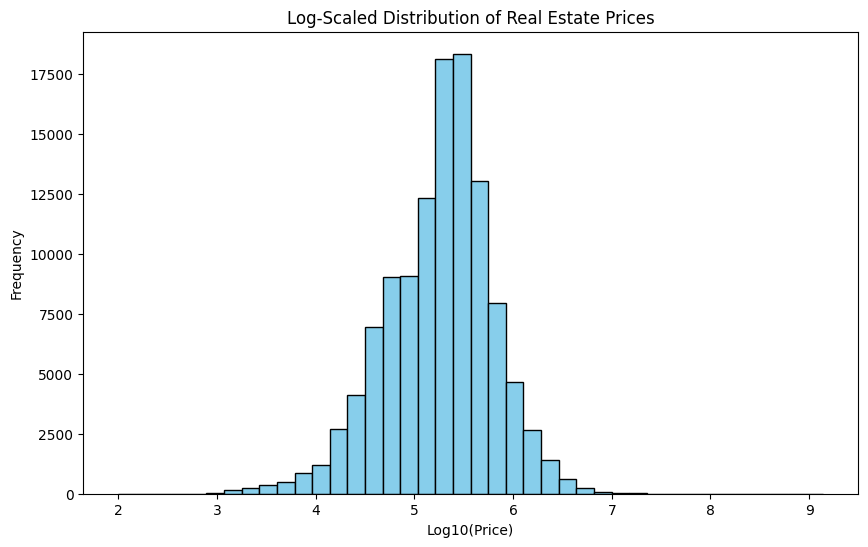

In [30]:
df['Price_Log'] = np.log10(df['Price'])

# Plot histogram
df['Price_Log'].plot(kind='hist', bins=40, figsize=(10, 6), edgecolor='black', color='skyblue')

# Adjust labels
plt.xlabel('Log10(Price)')
plt.ylabel('Frequency')
plt.title('Log-Scaled Distribution of Real Estate Prices')
plt.show()

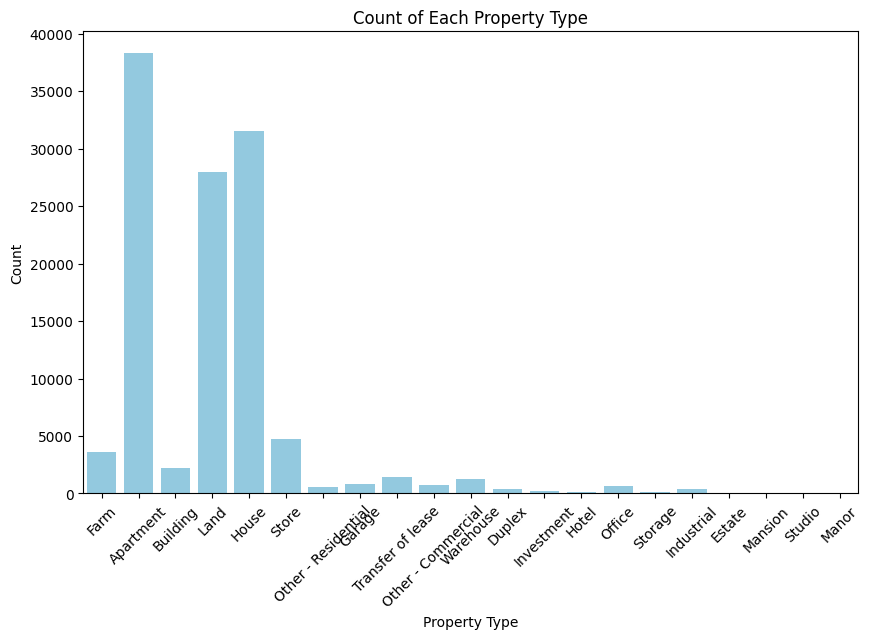

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df, color='skyblue')
plt.title('Count of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

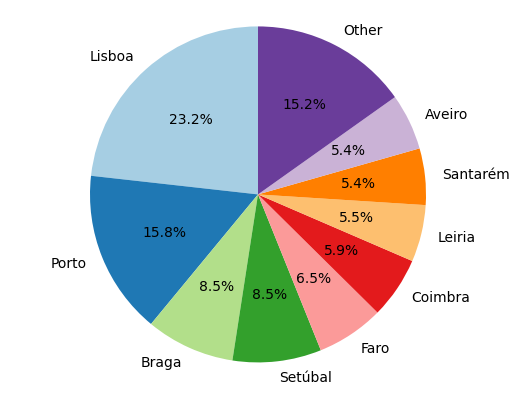

In [32]:
district_counts = df['District'].value_counts()
total_count = district_counts.sum()
district_percentages = (district_counts / total_count) * 100

district_main = district_counts[district_percentages >= 5]
district_other = district_counts[district_percentages < 5].sum()

district_counts_final = pd.concat([district_main, pd.Series({'Other': district_other})])

fig, ax = plt.subplots()
ax.pie(district_counts_final.values, labels=district_counts_final.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.axis('equal')
plt.show()

#### **Bivariate Analysis**

Involves the analysis of two variables to explore the relationship between them.

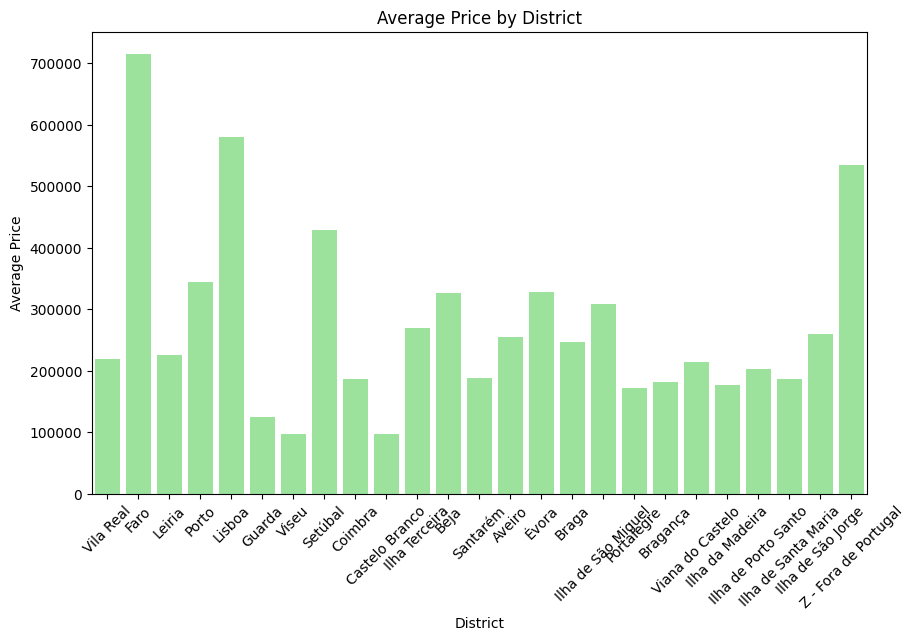

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='District', y='Price', data=df, estimator='mean', errorbar=None, color='lightgreen')
plt.title('Average Price by District')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

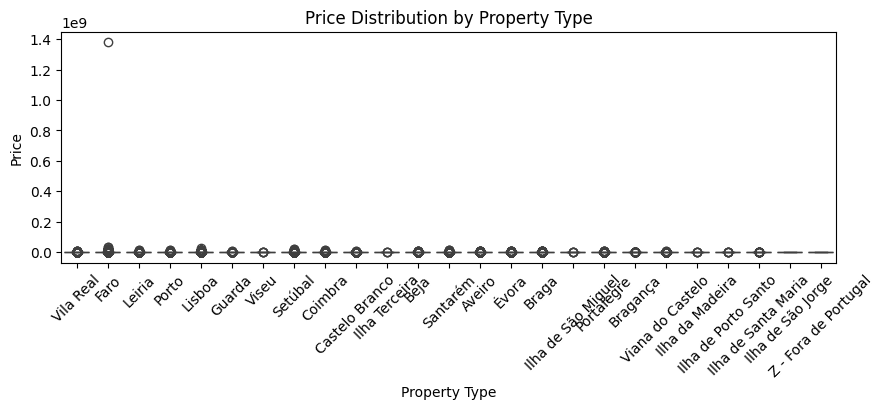

In [34]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='District', y='Price', data=df)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

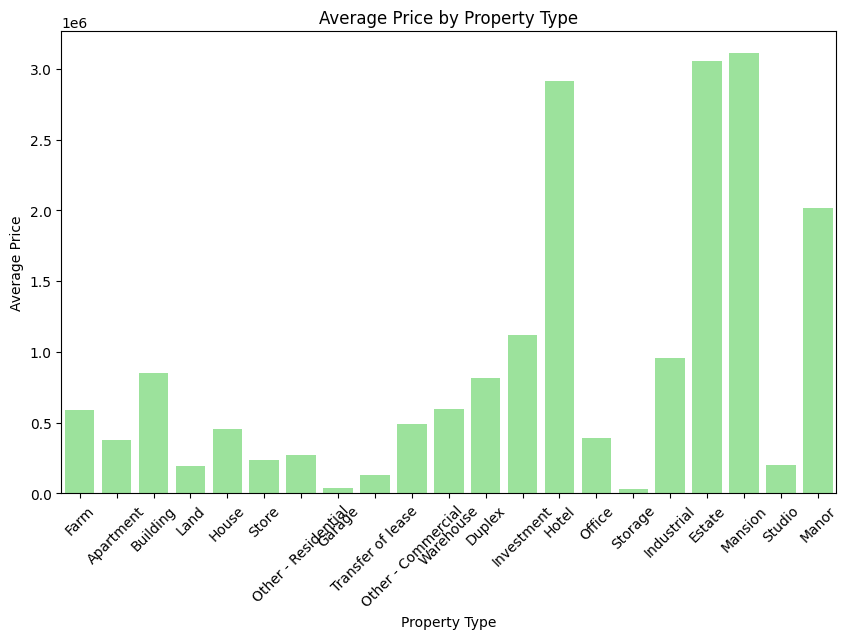

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Price', data=df, estimator='mean', errorbar=None, color='lightgreen')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

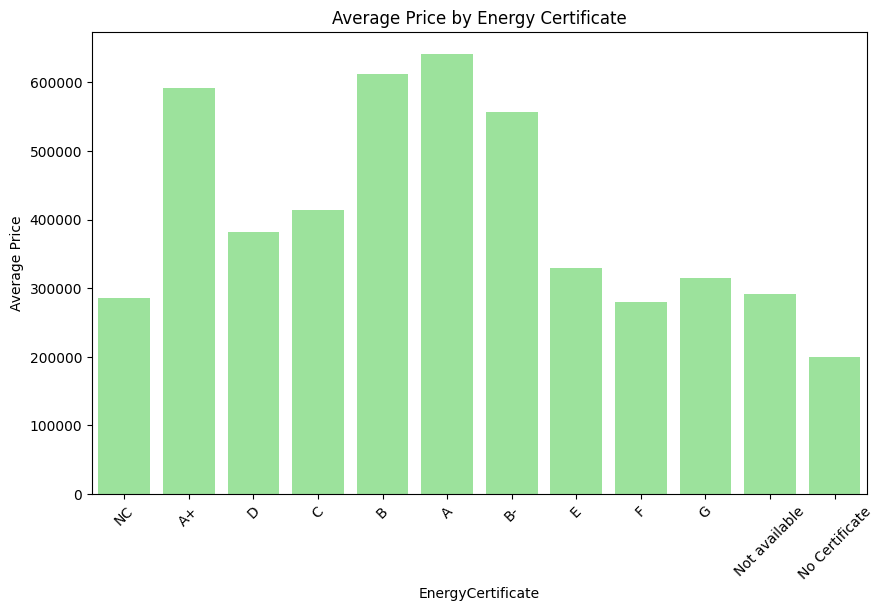

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EnergyCertificate', y='Price', data=df, estimator='mean', errorbar=None, color='lightgreen')
plt.title('Average Price by Energy Certificate')
plt.xlabel('EnergyCertificate')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

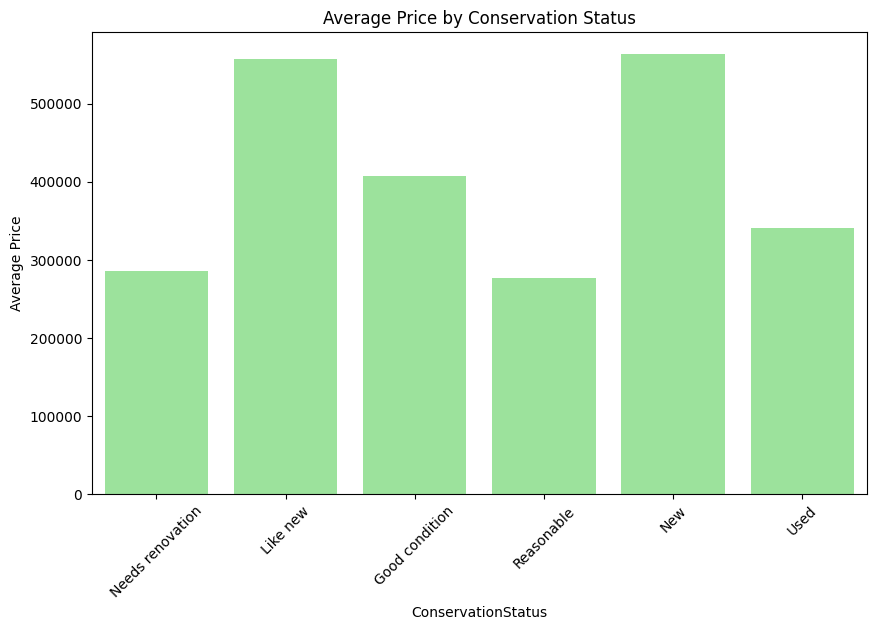

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ConservationStatus', y='Price', data=df, estimator='mean', errorbar=None, color='lightgreen')
plt.title('Average Price by Conservation Status')
plt.xlabel('ConservationStatus')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

##### **Multivariate Analysis** 
Involves the analysis of three or more variables simultaneously.

**Correlation HeatMap**

Only with numerical columns.

In [38]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

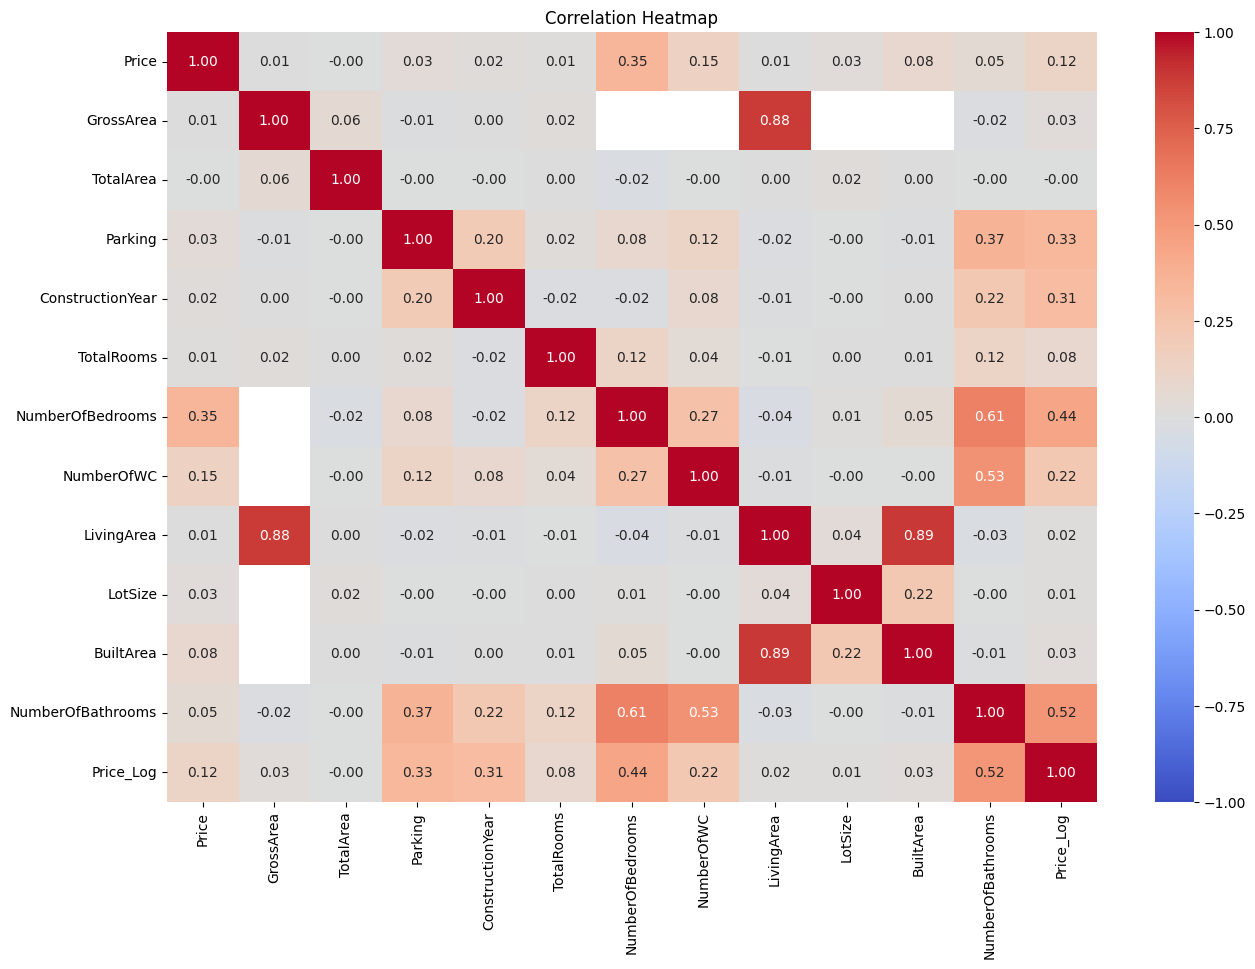

In [39]:
corr_matrix = df[numerical_columns].corr(method='pearson')  # You can use 'spearman' or 'kendall' too

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## **Focus on some parts of the dataset**

Focus on some specific types (Apartment and House).

In [40]:
ds = df[(df['Type'] == 'Apartment') | (df['Type'] == 'House')]

In [41]:
ds

,Price,District,City,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,Floor,...,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,Price_Log
1,223000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,True,Ground Floor,...,NaN,2.0,NaN,NaN,NaN,81.0,NaN,NaN,2.0,5.348305
2,228000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,True,Ground Floor,...,NaN,2.0,NaN,NaN,NaN,108.0,NaN,NaN,2.0,5.357935
3,250000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,1st Floor,...,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,0.0,5.397940
4,250000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,True,2nd Floor,...,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0,5.397940
5,250000.0,Faro,São Brás de Alportel,Apartment,A+,NaN,115.0,1.0,True,1st Floor,...,NaN,2.0,NaN,NaN,NaN,115.0,NaN,NaN,2.0,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122215,159000.0,Setúbal,Moita,Apartment,C,NaN,84.0,0.0,NaN,NaN,...,False,NaN,2.0,0.0,NaN,84.0,NaN,NaN,1.0,5.201397
122218,140000.0,Viana do Castelo,Ponte da Barca,Apartment,E,NaN,72.0,0.0,NaN,NaN,...,False,2.0,1.0,0.0,Used,72.0,NaN,NaN,1.0,5.146128
122220,130000.0,Vila Real,Chaves,Apartment,NC,NaN,65.0,0.0,NaN,NaN,...,False,3.0,2.0,NaN,NaN,65.0,NaN,65.0,1.0,5.113943
122221,130000.0,Vila Real,Chaves,Apartment,E,NaN,54.0,0.0,NaN,NaN,...,False,5.0,1.0,0.0,Like new,54.0,54.0,NaN,1.0,5.113943


In [42]:
print(ds.isna().sum() / len(ds))

Price                    0.002879
District                 0.000000
City                     0.000000
Type                     0.000000
EnergyCertificate        0.000000
GrossArea                0.721123
TotalArea                0.000129
Parking                  0.001332
HasParking               0.431602
Floor                    0.670253
ConstructionYear         0.131108
EnergyEfficiencyLevel    0.568527
PublishDate              0.814469
Garage                   0.568527
Elevator                 0.000129
ElectricCarsCharging     0.568527
TotalRooms               0.211876
NumberOfBedrooms         0.568555
NumberOfWC               0.615858
ConservationStatus       0.834596
LivingArea               0.000201
LotSize                  0.800444
BuiltArea                0.788568
NumberOfBathrooms        0.005573
Price_Log                0.002879
dtype: float64


Features with a percentage above 50 of missing values must be removed.

In [43]:
ds = ds.drop(columns=['GrossArea', 'Floor', 'EnergyEfficiencyLevel', 'PublishDate', 'Garage', 'ElectricCarsCharging', 'NumberOfBedrooms', 'NumberOfWC', 'ConservationStatus', 'LotSize', 'BuiltArea'])

In [44]:
print(ds.isna().sum() / len(ds))

Price                0.002879
District             0.000000
City                 0.000000
Type                 0.000000
EnergyCertificate    0.000000
TotalArea            0.000129
Parking              0.001332
HasParking           0.431602
ConstructionYear     0.131108
Elevator             0.000129
TotalRooms           0.211876
LivingArea           0.000201
NumberOfBathrooms    0.005573
Price_Log            0.002879
dtype: float64
